Epoch:0 w = Parameter containing:
tensor([-0.8912], requires_grad=True) b = Parameter containing:
tensor([-0.4891], requires_grad=True) loss = 1000.0338134765625
Epoch:1 w = Parameter containing:
tensor([-0.8823], requires_grad=True) b = Parameter containing:
tensor([-0.4842], requires_grad=True) loss = 989.6915283203125
Epoch:2 w = Parameter containing:
tensor([-0.8735], requires_grad=True) b = Parameter containing:
tensor([-0.4793], requires_grad=True) loss = 979.5060424804688
Epoch:3 w = Parameter containing:
tensor([-0.8648], requires_grad=True) b = Parameter containing:
tensor([-0.4745], requires_grad=True) loss = 969.4744873046875
Epoch:4 w = Parameter containing:
tensor([-0.8561], requires_grad=True) b = Parameter containing:
tensor([-0.4698], requires_grad=True) loss = 959.59423828125
Epoch:5 w = Parameter containing:
tensor([-0.8476], requires_grad=True) b = Parameter containing:
tensor([-0.4651], requires_grad=True) loss = 949.8631591796875
Epoch:6 w = Parameter containing:
t

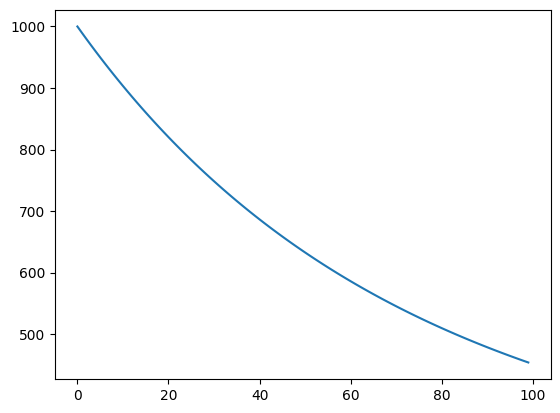

In [18]:
#Q1
import torch
from torch import nn
import matplotlib.pyplot as plt
X = torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,17.0,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2])
y = torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,16.8,15.2,17.0,17.2,18.6])
learning_rate = 0.01

class LinearRegression(nn.Module):

    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn([1],requires_grad=True))
        self.bias = nn.Parameter(torch.randn([1],requires_grad=True))

    def forward(self,X):
        return self.weight*X + self.bias
    
    def update(self):
        self.weight -= learning_rate*self.weight
        self.bias -= learning_rate*self.bias
    
    def reset_grad(self):
        if self.weight.grad is not None:
            self.weight.grad.zero_()
        if self.bias.grad is not None:
            self.bias.grad.zero_()


def criterion(y,y_p):
    return (y - y_p)**2

model = LinearRegression()
loss_list = []
for epoch in range(100):
    loss = 0.0
    model.reset_grad()  
    for i in range(len(X)):
        y_p = model(X[i])  
        loss += criterion(y[i], y_p)  
    
    loss /= len(X)  
    
    loss.backward()  
    with torch.no_grad():
        model.update()  
    
    loss_list.append(loss.item())
    

    print(f"Epoch:{epoch} w = {model.weight} b = {model.bias} loss = {loss.item()}")

plt.plot(range(100),loss_list)


epoch:0 w:Parameter containing:
tensor([0.5110], requires_grad=True) w:Parameter containing:
tensor([-0.3365], requires_grad=True) loss:450.18389892578125 
epoch:1 w:Parameter containing:
tensor([0.5105], requires_grad=True) w:Parameter containing:
tensor([-0.3362], requires_grad=True) loss:450.23223876953125 


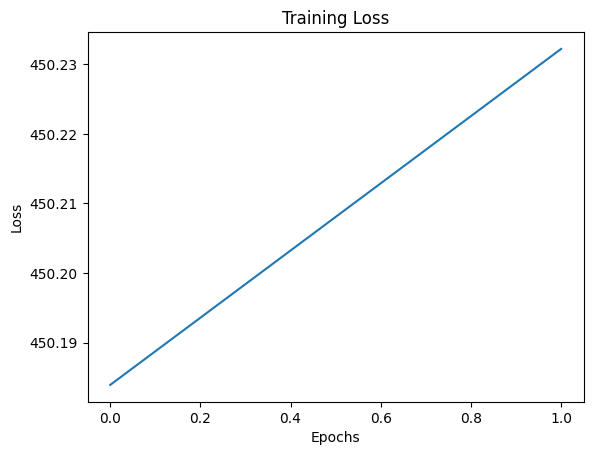

In [19]:
#Q2 
import torch
X = torch.tensor([2,4],dtype=torch.float32)
y = torch.tensor([20,40],dtype=torch.float32)
learning_rate = 0.001

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,dtype=torch.float32),requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float32),requires_grad=True)
    
    def forward(self,X):
        return self.weight*X + self.bias
    
    def reset_grad(self):
        if self.weight.grad is not None:
            self.weight.grad.zero_()
        if self.bias.grad is not None:
            self.bias.grad.zero_()
    
    def update(self):
        self.weight -= learning_rate*self.weight
        self.bias -= learning_rate*self.bias

def compute_loss(y, y_p):
    return torch.mean((y - y_p)**2)

model = LinearRegression()
epochs = 2
loss_list = []

for epoch in range(epochs):
    for j in range(len(X)):
        y_pred = model(X[j])
        model.reset_grad()
        loss = compute_loss(y,y_pred)
    
    loss /= len(X)
    loss.backward()

    with torch.no_grad():
        model.update()
    loss_list.append(loss.detach().item())
    print(f"epoch:{epoch} w:{model.weight} w:{model.bias} loss:{loss} ")

plt.plot(range(0,epochs,1), loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

epoch:0 w:6.304100036621094 b:-0.333970844745636 loss:31588.73046875 
epoch:1 w:7.594178676605225 b:-0.26946690678596497 loss:6096.189453125 
epoch:2 w:7.84961462020874 b:-0.25669512152671814 loss:5096.779296875 
epoch:3 w:7.900190830230713 b:-0.25416630506515503 loss:5057.5986328125 
epoch:4 w:7.910204887390137 b:-0.25366559624671936 loss:5056.0625 
epoch:5 w:7.912187099456787 b:-0.2535664737224579 loss:5056.0029296875 
epoch:6 w:7.9125800132751465 b:-0.2535468339920044 loss:5056.0 
epoch:7 w:7.912657737731934 b:-0.253542959690094 loss:5056.00048828125 
epoch:8 w:7.912672996520996 b:-0.2535421848297119 loss:5056.0 
epoch:9 w:7.912675857543945 b:-0.2535420358181 loss:5056.00048828125 
epoch:10 w:7.91267728805542 b:-0.2535419762134552 loss:5056.00048828125 
epoch:11 w:7.91267728805542 b:-0.2535419762134552 loss:5056.0 
epoch:12 w:7.91267728805542 b:-0.2535419762134552 loss:5056.0 
epoch:13 w:7.91267728805542 b:-0.2535419762134552 loss:5056.0 
epoch:14 w:7.91267728805542 b:-0.25354197621

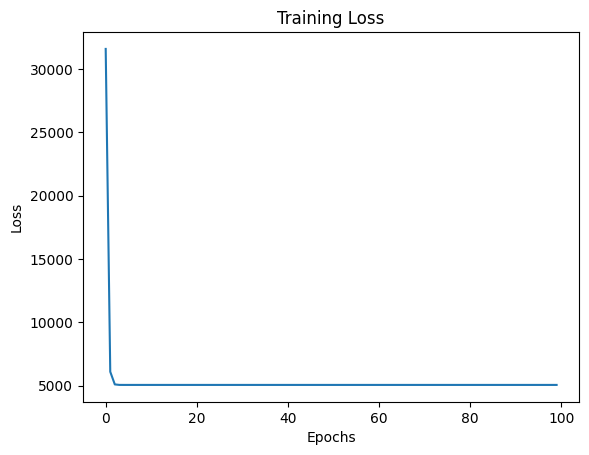

OrderedDict([('w', tensor([7.9127])), ('b', tensor([-0.2535]))])

In [20]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

X = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
learning_rate = 0.001

class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.randn(1, requires_grad=True))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, x):
        return self.w * x + self.b
    
    def reset_grad(self):
        if self.w.grad is not None:
            self.w.grad.zero_()
        if self.b.grad is not None:
            self.b.grad.zero_()
    
    def update(self):
        self.w.data -= learning_rate * self.w.grad
        self.b.data -= learning_rate * self.b.grad

def compute_loss(y, y_p):
    return torch.mean((y - y_p)**2)

model = RegressionModel()
epochs = 100
loss_list = []

for epoch in range(epochs):
    for j in range(len(X)):
        y_pred = model(X[j])
        model.reset_grad()
        loss = compute_loss(y, y_pred)
        
    loss.backward()
    
    with torch.no_grad():
        model.update()
        
    loss_list.append(loss.detach().item())
    print(f"epoch:{epoch} w:{model.w.item()} b:{model.b.item()} loss:{loss} ")

plt.plot(range(epochs), loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

model.state_dict()


Input batch:tensor([16., 12.])
Output batch:tensor([210., 180.])
Input batch:tensor([20.,  7.])
Output batch:tensor([240., 120.])
Input batch:tensor([5.])
Output batch:tensor([40.])
Epoch: 0| loss: 1931.0302734375
Epoch: 10| loss: 663.6755981445312
Epoch: 20| loss: 228.09861755371094
Epoch: 30| loss: 78.3952407836914
Epoch: 40| loss: 26.943649291992188
Epoch: 50| loss: 9.260262489318848
Epoch: 60| loss: 3.182657480239868
Epoch: 70| loss: 1.093847632408142
Epoch: 80| loss: 0.37594079971313477
Epoch: 90| loss: 0.1292107105255127


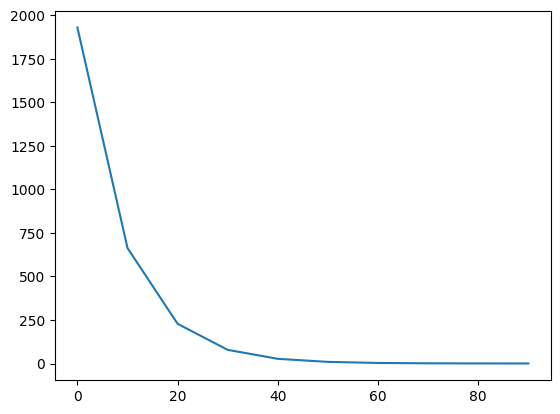

In [21]:
#Q4 
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn 

class MyDataset(Dataset):
    def __init__(self,X,y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self,idx):
        return self.X[idx],self.y[idx]

X = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
dataset = MyDataset(X,y)
dataloader = DataLoader(dataset,batch_size=2,shuffle=True)
for batch in dataloader:
    X_batch,y_batch = batch
    print(f"Input batch:{X_batch}")
    print(f"Output batch:{y_batch}")

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.randn(1,requires_grad=True))
        self.b = nn.Parameter(torch.randn(1,requires_grad=True))

    def forward(self,X):
        return self.w*X + self.b

model = LinearRegression()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)
epochs = 100
epoch_list,loss_list = [],[]
for epoch in range(epochs):
    y_pred = model(X_batch)
    loss = loss_fn(y_pred,y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        epoch_list.append(epoch)
        loss_list.append(loss.detach().numpy())
        print(f"Epoch: {epoch}| loss: {loss}")
plt.plot(epoch_list,loss_list)

Input batch:tensor([ 7., 12.])
Output batch:tensor([120., 180.])
Input batch:tensor([20., 16.])
Output batch:tensor([240., 210.])
Input batch:tensor([5.])
Output batch:tensor([40.])
Epoch: 0| loss: 1759.834228515625
Epoch: 10| loss: 604.837158203125
Epoch: 20| loss: 207.87649536132812
Epoch: 30| loss: 71.445068359375
Epoch: 40| loss: 24.55499267578125
Epoch: 50| loss: 8.439306259155273
Epoch: 60| loss: 2.9005048274993896
Epoch: 70| loss: 0.9968820214271545
Epoch: 80| loss: 0.3426167964935303
Epoch: 90| loss: 0.11775529384613037


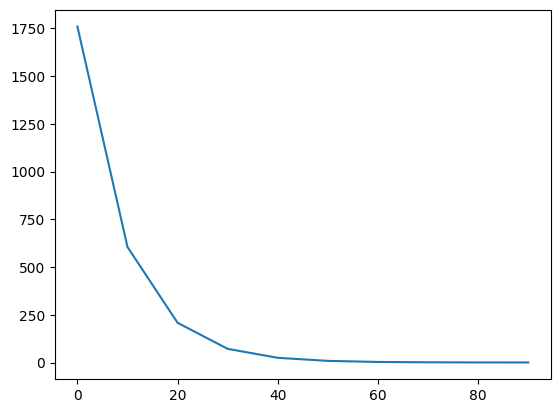

In [22]:
#Q4 
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn 

class MyDataset(Dataset):
    def __init__(self,X,y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self,idx):
        return self.X[idx],self.y[idx]

X = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
dataset = MyDataset(X,y)
dataloader = DataLoader(dataset,batch_size=2,shuffle=True)
for batch in dataloader:
    X_batch,y_batch = batch
    print(f"Input batch:{X_batch}")
    print(f"Output batch:{y_batch}")

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,out_features=1)

    def forward(self,X):
        return self.linear_layer(X)

model = LinearRegression()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)
epochs = 100
epoch_list,loss_list = [],[]
for epoch in range(epochs):
    y_pred = model(X_batch)
    loss = loss_fn(y_pred,y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        epoch_list.append(epoch)
        loss_list.append(loss.detach().numpy())
        print(f"Epoch: {epoch}| loss: {loss}")
plt.plot(epoch_list,loss_list)

In [25]:
#Q6 
import torch 
from torch import nn
from torch.utils.data import Dataset,DataLoader

X1 = torch.tensor([3,4,5,6,2],dtype=torch.float32)
X2 = torch.tensor([8,5,7,3,1],dtype=torch.float32)
y = torch.tensor([-3.7,3.5,2.5,11.5,5.7],dtype=torch.float32)

class MyDataset(Dataset):
    def __init__(self,X1,X2,y):
        super().__init__()
        self.X1 = X1
        self.X2 = X2
        self.y = y

    def __len__(self):
        return len(self.X1)
    
    def __getitem__(self, index):
        return self.X1[index],self.X2[index],self.y[index]

class MultipleLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=2,out_features=1)
    
    def forward(self, X1, X2):
        x = torch.stack((X1, X2), dim=1)
        return self.linear_layer(x)
    
dataset = MyDataset(X1,X2,y)
dataloader = DataLoader(dataset,batch_size=2,shuffle=True)
model = MultipleLinearRegression()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)
epochs = 100
epochs_list,loss_list = [],[]
for epoch in range(epochs):
    for X1_batch,X2_batch,y_batch in dataloader:
        y_pred = model(X1_batch,X2_batch)
        loss = loss_fn(y_pred,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


    with torch.no_grad():
        predicted = model(X1, X2)
        print("Predictions:", predicted)

pred = model(torch.tensor([1],dtype=torch.float32),torch.tensor([3],dtype=torch.float32))
print(f"For Datapoint (1,3) model prediction is {pred}")

Predictions: tensor([[5.8777],
        [4.3594],
        [5.9529],
        [3.8124],
        [1.1726]])
Predictions: tensor([[2.9406],
        [2.3072],
        [3.1445],
        [2.2170],
        [0.6325]])
Predictions: tensor([[3.8625],
        [3.1543],
        [4.2408],
        [3.1736],
        [0.9813]])
Predictions: tensor([[5.0282],
        [4.2420],
        [5.6430],
        [4.4194],
        [1.4399]])
Predictions: tensor([[2.7101],
        [2.4958],
        [3.2866],
        [2.8712],
        [0.9141]])
Predictions: tensor([[3.6985],
        [3.3924],
        [4.4501],
        [3.8712],
        [1.2768]])
Predictions: tensor([[4.1871],
        [3.8321],
        [5.0191],
        [4.3557],
        [1.4580]])
Predictions: tensor([[2.7732],
        [2.7641],
        [3.5770],
        [3.4034],
        [1.1383]])
Predictions: tensor([[4.0091],
        [3.7660],
        [4.9032],
        [4.3840],
        [1.4918]])
Epoch [10/100], Loss: 24.1909
Epoch [10/100], Loss: 24.7960
Epoc

C:\Users\rsurs\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\rsurs\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [40]:
import torch 
from torch import nn 
from torch.utils.data import Dataset,DataLoader

X = torch.tensor([1,5,10,10,25,50,70,75,100],dtype=torch.float32)
y = torch.tensor([0,0,0,0,0,1,1,1,1],dtype=torch.float32)

class MyDataset(Dataset):
    def __init__(self,X,y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index],self.y[index]
    
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,out_features=1)
    
    def forward(self,X):
        return self.linear_layer(X)

epochs = 100
dataset = MyDataset(X,y)
dataloader = DataLoader(dataset,batch_size=2,shuffle=True)
model = LogisticRegression()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)
for epoch in range(epochs):
    for X_batch,y_batch in dataloader:  
        logits = model(X_batch.unsqueeze(dim=1))
        y_pred = torch.round(torch.sigmoid(logits))
        loss = loss_fn(y_pred,y_batch.unsqueeze(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, model parameters: {list(model.parameters())} ')


Epoch [10/100], Loss: 0.6931, model parameters: [Parameter containing:
tensor([[-0.8210]], requires_grad=True), Parameter containing:
tensor([0.9616], requires_grad=True)] 
Epoch [20/100], Loss: 0.6931, model parameters: [Parameter containing:
tensor([[-0.8210]], requires_grad=True), Parameter containing:
tensor([0.9616], requires_grad=True)] 
Epoch [30/100], Loss: 0.6931, model parameters: [Parameter containing:
tensor([[-0.8210]], requires_grad=True), Parameter containing:
tensor([0.9616], requires_grad=True)] 
Epoch [40/100], Loss: 1.3133, model parameters: [Parameter containing:
tensor([[-0.8210]], requires_grad=True), Parameter containing:
tensor([0.9616], requires_grad=True)] 
Epoch [50/100], Loss: 0.6931, model parameters: [Parameter containing:
tensor([[-0.8210]], requires_grad=True), Parameter containing:
tensor([0.9616], requires_grad=True)] 
Epoch [60/100], Loss: 1.3133, model parameters: [Parameter containing:
tensor([[-0.8210]], requires_grad=True), Parameter containing:
t